<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 重點
  * 如何模擬這些分配的樣本點
  * 進行一些機率的運算，包含以下離散型分配        
    4. 負二項分配(Negative Binomial Distribution)  
    5. 超幾何分配(Hypergeometric Distribution)  

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

## 負二項分配 (Negative Binomial Distribution)

* 說明：在一系列獨立同分布的伯努利試驗中，X 為成功次數到達指定次數 (記為 𝑘) 時，需要試驗的次數的機率分布
  * p：成功的機率，(1-p)：失敗的機率
  * k：累積到 k 次成功後才停止
  * r：產生出 樣本點空間
* 滿足以下條件稱之
  * 實驗包含一系列獨立的實驗
  * 每個實驗都有成功與失敗兩種結果
  * 成功的機率是恆定的
  * 實驗持續到第 r 次失敗，r 可為任意正數
* 函數：
  * $ P(X=x) = C_{k-1}^{x-1} p^k (1-p)^{x-k} $, $ x=k,k+1,k+2,... $ 
  * $ X \sim NB(k,p) $
* 性質：
  * $ E(X) = \mu = \frac{r q}{p} =\frac{ r(1-p) }{p} $
  * $ V(X) = \sigma = \frac{r q}{p^2} =\frac{ r(1-p) }{p^2} $
* 語法

| 負二項分配 | 語法(scipy.stats) |
|-------------|:-------------:|
| 機率質量函數 | nbinom.pmf |
| 累積機率函數 | nbinom.cdf |
| 樣本點 | nbinom.rvs |
| 統計量計算 | nbinom.stats |


* 範例：<br>
  同時投擲 2 個公平的骰子，求在第 8 次投擲且第 2 次點數和為 7 之機率<br>
  → 2 個骰子點數和為 7 的次數 k=2，2 個骰子點數和非 7 的次數 x=6
    
    $ P(X=8) = C_{2-1}^{8-1} (\frac{1}{6})^2 (1-\frac{1}{6})^{8-2} $

In [2]:
from scipy.stats import nbinom

1. 定義負二項分配的基本資訊

In [3]:
p = 0.4 #成功的機率
k = 3   #指定次數
mean, var, skew, kurt = nbinom.stats(k, p, moments='mvsk')

#產生一個同樣間隔的序列
#print(stats.nbinom.ppf(0.01, k, p)) #0.0
#print(stats.nbinom.ppf(0.99, k, p)) #15

r = np.arange(stats.nbinom.ppf(0.01, k, p),
              stats.nbinom.ppf(0.99, k, p))
print(r)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


2. 計算機率質量函數 (probability mass function)

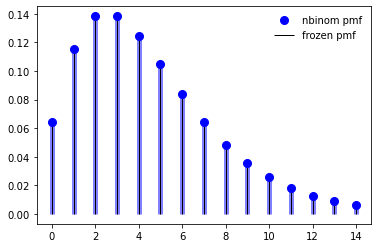

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(r, nbinom.pmf(r, k, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(r, 0, nbinom.pmf(r, k, p), colors='b', lw=5, alpha=0.5)
rv = nbinom(k, p)
ax.vlines(r, 0, rv.pmf(r), colors='k', linestyles='-', lw=1,
          label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [5]:
# P(X=x) --> 是機率
probs = stats.nbinom.pmf(r, k, p)
print(probs)
print(type(probs))

[0.064      0.1152     0.13824    0.13824    0.124416   0.10450944
 0.08360755 0.06449725 0.04837294 0.03547349 0.02554091 0.01811083
 0.01267758 0.00877679 0.00601837]
<class 'numpy.ndarray'>


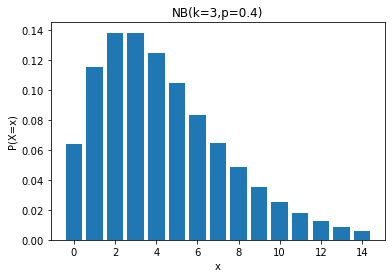

In [6]:
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('NB(k=3,p=0.4)')
plt.show()

3. 計算負二項分佈的累積機率 (cumulative density function)，pmf 的累加

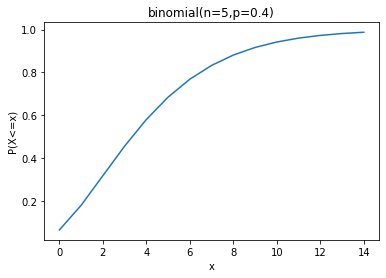

In [7]:
# P(X=x) --> 是機率
cumsum_probs = stats.nbinom.cdf(r, k, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [8]:
p_loc= stats.nbinom.ppf(cumsum_probs, k, p)
print(p_loc)
#看上圖看結果

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


5. 產生符合負二項分佈的隨機樣本點 (random sample)

[4 1 1 3 3 0 3 5 4 5 6 6 3 3 3 2 0 4 5 3]


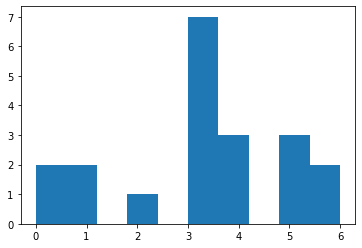

In [9]:
X = stats.nbinom.rvs(k,p,size=20)
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [10]:
stat_nbin=stats.nbinom.stats(k,p,moments='mvks')
print(stat_nbin)
print(type(stat_nbin))
#E(X)
print("negative binomial mean=",float(stat_nbin[0]))
print("negative binomial variance=",float(stat_nbin[1]))
print("negative binomial kurtosis=",float(stat_nbin[2]))
print("negative binomial skew=",float(stat_nbin[3]))

(array(4.5), array(11.25), array(1.19256959), array(2.08888889))
<class 'tuple'>
negative binomial mean= 4.5
negative binomial variance= 11.25
negative binomial kurtosis= 1.1925695879998879
negative binomial skew= 2.088888888888889


## 超幾何分配 (Hypergeometric Distribution)

* 說明：由有限個(N)物件中抽出 n 個物件，成功抽出指定種類的物件的個數 (取後不放回(without replacement))
  * 若隨機變量 X 服從參數，則記為 H(n, K, N)
    * 𝑁：共有幾個物件，𝑁 = 0,1,…
    * 𝐾：𝑁 個物件中，有 𝐾 個是你關心的物件類型個數，𝐾 = 0,1,2,…, 𝑁
    * n：K 個物件，要抽出 n 個物件，n = 0,1,…, 𝑁
    
|  | 母體 | 樣本 |
|----|:----:|:----:|
| 數量 | N | n |
| 成功數量 | K | x |
| 失敗數量 | N-K | n-x |

<br> 

* 範例：現在有兩堆骰子，30 個為紅色數字，20 個為黑色數字，取出 10 個，有 3 個是全紅的<br>
  $ P(X=3) = \frac{ C_3^{30} C_{10-3}^{50-30} }{ C_{10}^{50} }$

In [11]:
from scipy.stats import hypergeom

1. 定義超幾何分配的基本資訊

In [12]:
N=50
K=30
n=10

#產生一個同樣間隔的序列
r = np.arange(0, min(n+1,K+1)) #產出 x 對應點
print(r)

[ 0  1  2  3  4  5  6  7  8  9 10]


2. 計算機率質量函數 (probability mass function)

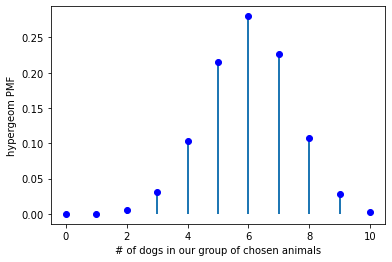

In [13]:
rv = hypergeom(N, n, K)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [14]:
# P(X=x) --> 是機率
probs = stats.hypergeom.pmf(r, N, K, n)
print(probs)
print(type(probs))

[1.79858837e-05 4.90524100e-04 5.33444958e-03 3.06388899e-02
 1.03406253e-01 2.15085007e-01 2.80058603e-01 2.25929629e-01
 1.08257947e-01 2.78558461e-02 2.92486384e-03]
<class 'numpy.ndarray'>


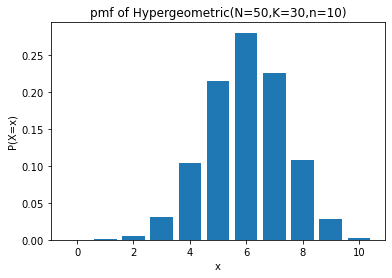

In [15]:
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of Hypergeometric(N=50,K=30,n=10)')
plt.show()

3. 計算超幾何分配的累積機率 (cumulative density function)，pmf 的累加

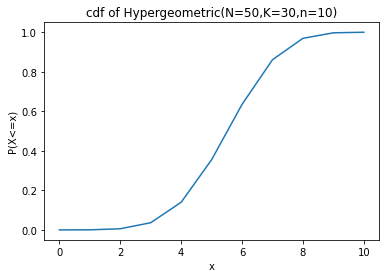

In [16]:
# P(X=x) --> 是機率
cumsum_probs = stats.hypergeom.cdf(r, N,K,n)
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('cdf of Hypergeometric(N=50,K=30,n=10)')
plt.plot(r, cumsum_probs)
plt.show()

4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [17]:
p_loc= stats.hypergeom.ppf(cumsum_probs, N,K,n)
print(p_loc)
#看上圖看結果

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


5. 產生符合超幾何分配的隨機樣本點 (random sample)

[ 6  3  8  5  5  7  5 10  8  7  8  6  6  5  7  6  6  8  8  6]


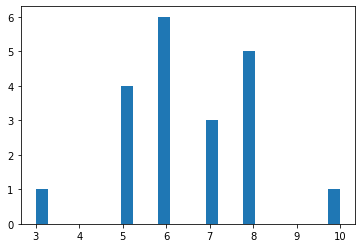

In [18]:
X = stats.hypergeom.rvs(N,K,n,size=20)
print(X)
plt.hist(X,bins=25)
plt.show()
#試試看，，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [19]:
stat_hyperg=stats.hypergeom.stats(N,K,n,moments='mvks')
print(stat_hyperg)
print(type(stat_hyperg))
#E(X)
print("negative hypergeom mean=",float(stat_hyperg[0]))
print("negative hypergeom variance=",float(stat_hyperg[1]))
print("negative hypergeom kurtosis=",float(stat_hyperg[2]))
print("negative hypergeom skew=",float(stat_hyperg[3]))

(array(6.), array(1.95918367), array(-0.08930431), array(-0.13162123))
<class 'tuple'>
negative hypergeom mean= 6.0
negative hypergeom variance= 1.9591836734693877
negative hypergeom kurtosis= -0.08930431353897003
negative hypergeom skew= -0.13162123226950354


## 範例: 丟 5次骰子出現紅色三次的機率
![](Binomail_example.PNG)
![](data.PNG)

In [20]:
# 用 python 計算
# 直接公式是運算
n=5
p=1/3
prob1=math.factorial(5)/math.factorial(2)/math.factorial(3)*pow(p,3)*pow((1-p),2) #page
print(prob1)

#P(X=3)
probs = stats.binom.pmf(3, n, p)
print(probs)
#兩者是相同的

0.1646090534979424
0.16460905349794233
